# Preparando espécie American Toad

## Limpando dataset

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [325]:
base = pd.read_csv("americanToadCorre.csv")

In [326]:
base.drop('id',axis=1,inplace=True)
base

,date,lat,lng,tornado,monthtodatesnowfalli,thunder,meantempi,snow,meanvism,meanwdire,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,NaN,0.0,62.0,0.0,NaN,Variable,...,-1.0,48.0,NaN,75.0,NaN,12.0,NaN,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,NaN,0.0,52.0,0.0,27.6,NE,...,38.0,50.0,17.2,98.0,NaN,6.0,NaN,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,NaN,0.0,44.0,0.0,NaN,ENE,...,59.0,36.0,NaN,100.0,NaN,-2.0,NaN,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,NaN,0.0,46.0,0.0,NaN,NW,...,320.0,38.0,NaN,95.0,NaN,5.0,NaN,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,NaN,0.0,40.0,0.0,NaN,South,...,191.0,30.0,NaN,83.0,NaN,0.0,NaN,49.0,39.0,21.0
5,20100709,46.438330,-64.127423,0.0,NaN,0.0,73.0,0.0,NaN,SW,...,218.0,66.0,NaN,92.0,NaN,19.0,NaN,80.0,69.0,62.0
6,20110512,46.334425,-63.703709,0.0,NaN,0.0,42.0,0.0,NaN,NE,...,39.0,38.0,NaN,95.0,NaN,4.0,NaN,44.0,39.0,37.0
7,20020830,50.705795,-97.102335,0.0,NaN,0.0,72.0,0.0,NaN,SSE,...,162.0,69.0,NaN,100.0,NaN,20.0,NaN,75.0,71.0,66.0
8,20020914,50.705795,-97.102335,0.0,NaN,0.0,54.0,0.0,NaN,WNW,...,297.0,43.0,NaN,96.0,NaN,7.0,NaN,64.0,46.0,38.0
9,20020917,50.705795,-97.102335,0.0,NaN,0.0,72.0,0.0,NaN,South,...,174.0,59.0,NaN,88.0,NaN,17.0,NaN,81.0,63.0,55.0


In [327]:
#Eliminando pontos coordenados errados
base.drop(3430,inplace=True)
base.drop(3434,inplace=True)
base.drop(3446,inplace=True)
base.drop(3454,inplace=True)
base.drop(3489,inplace=True)
base.drop(3533,inplace=True)
base.drop(3420,inplace=True)

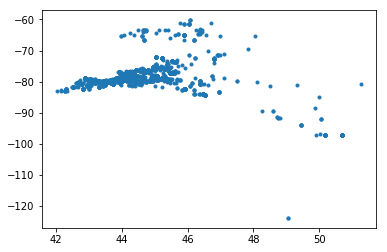

In [328]:
plt.scatter(base["lat"].head(3455), base["lng"].head(3455),marker=".")

In [329]:
base.shape

(3675, 72)

In [330]:
#Base original
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 72 columns):
date                                  3675 non-null int64
lat                                   3675 non-null float64
lng                                   3675 non-null float64
tornado                               3561 non-null float64
monthtodatesnowfalli                  24 non-null object
thunder                               3561 non-null float64
meantempi                             3502 non-null float64
snow                                  3561 non-null float64
meanvism                              1691 non-null float64
meanwdire                             3430 non-null object
minhumidity                           3484 non-null float64
maxvism                               1691 non-null float64
since1jancoolingdegreedays            39 non-null float64
coolingdegreedays                     3502 non-null float64
maxdewptm                             3484 non-null float64
m

In [331]:
#Descrição da base original
base.describe()

,date,lat,lng,tornado,thunder,meantempi,snow,meanvism,minhumidity,maxvism,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
count,3.675000e+03,3675.000000,3675.000000,3561.0,3561.000000,3502.000000,3561.000000,1691.000000,3484.000000,1691.000000,...,3561.000000,3484.000000,1691.00000,3484.000000,24.0,3503.000000,24.000000,3503.000000,3484.000000,3484.000000
mean,2.008286e+07,44.922232,-78.370079,0.0,0.046616,58.595945,0.005336,17.144648,43.931688,20.598108,...,138.276889,48.096728,10.66984,89.204937,0.0,8.805881,36.750000,69.580645,53.421929,42.293915
std,5.152130e+04,1.592920,6.048941,0.0,0.210845,9.752716,0.072860,5.771699,18.516513,4.592061,...,116.293902,11.177302,3.59805,11.459220,0.0,5.713660,29.078679,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-123.883420,0.0,0.000000,-11.000000,0.000000,1.600000,4.000000,3.000000,...,-1.000000,-17.000000,1.00000,24.000000,0.0,-33.000000,0.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.750000,0.0,0.000000,52.000000,0.000000,13.650000,30.000000,16.000000,...,-1.000000,40.000000,8.50000,84.000000,0.0,5.000000,0.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.0,0.000000,59.000000,0.000000,16.000000,42.500000,24.100000,...,146.000000,49.000000,10.00000,93.000000,0.0,9.000000,58.800000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.501954,0.0,0.000000,66.000000,0.000000,23.400000,56.000000,24.100000,...,234.000000,56.000000,14.60000,99.000000,0.0,13.000000,58.800000,77.000000,61.000000,51.000000
max,2.018100e+07,51.269538,-52.736600,0.0,1.000000,85.000000,1.000000,29.200000,100.000000,32.200000,...,360.000000,77.000000,18.10000,100.000000,0.0,25.000000,58.800000,130.000000,88.000000,75.000000


In [332]:
# Elimina as features com poucos valores ou as que são preenchidas com 0
zeros = []
poucos = []
for c in base.columns:
    if (base[c].dtype != 'object' and base[c].mean() == 0):
        base.drop(c,axis=1,inplace=True)
        zeros.append(c)
    elif (base[c].count() < 1700):
        poucos.append(c)
        base.drop(c,axis=1,inplace=True)
zeros

['tornado', 'snowdepthm', 'snowdepthi']

In [333]:
poucos

['monthtodatesnowfalli',
 'meanvism',
 'maxvism',
 'since1jancoolingdegreedays',
 'monthtodatecoolingdegreedays',
 'since1sepheatingdegreedays',
 'since1julsnowfallm',
 'monthtodatesnowfallm',
 'since1sepcoolingdegreedaysnormal',
 'monthtodateheatingdegreedaysnormal',
 'snowfallm',
 'since1julheatingdegreedays',
 'coolingdegreedaysnormal',
 'minvisi',
 'since1sepheatingdegreedaysnormal',
 'since1julheatingdegreedaysnormal',
 'snowfalli',
 'monthtodateheatingdegreedays',
 'monthtodatecoolingdegreedaysnormal',
 'since1sepcoolingdegreedays',
 'minvism',
 'maxvisi',
 'heatingdegreedaysnormal',
 'since1jancoolingdegreedaysnormal',
 'meanvisi',
 'since1julsnowfalli']

In [334]:
base.shape

(3675, 43)

In [335]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,62.0,0.0,Variable,50.0,0.0,10.0,...,16.0,30.04,30.01,-1.0,48.0,75.0,12.0,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,52.0,0.0,NE,46.0,0.0,12.0,...,12.0,30.26,30.03,38.0,50.0,98.0,6.0,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,44.0,0.0,ENE,36.0,0.0,6.0,...,7.0,30.22,30.07,59.0,36.0,100.0,-2.0,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,46.0,0.0,NW,51.0,0.0,7.0,...,7.0,29.61,29.49,320.0,38.0,95.0,5.0,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,40.0,0.0,South,32.0,0.0,4.0,...,4.0,30.27,30.12,191.0,30.0,83.0,0.0,49.0,39.0,21.0
5,20100709,46.438330,-64.127423,0.0,73.0,0.0,SW,52.0,8.0,21.0,...,22.0,30.01,29.89,218.0,66.0,92.0,19.0,80.0,69.0,62.0
6,20110512,46.334425,-63.703709,0.0,42.0,0.0,NE,77.0,0.0,4.0,...,5.0,30.17,30.04,39.0,38.0,95.0,4.0,44.0,39.0,37.0
7,20020830,50.705795,-97.102335,0.0,72.0,0.0,SSE,79.0,6.0,22.0,...,22.0,NaN,NaN,162.0,69.0,100.0,20.0,75.0,71.0,66.0
8,20020914,50.705795,-97.102335,0.0,54.0,0.0,WNW,38.0,0.0,8.0,...,12.0,NaN,NaN,297.0,43.0,96.0,7.0,64.0,46.0,38.0
9,20020917,50.705795,-97.102335,0.0,72.0,0.0,South,41.0,7.0,17.0,...,22.0,NaN,NaN,174.0,59.0,88.0,17.0,81.0,63.0,55.0


In [336]:
#Descrição da base após eliminação de features
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,3.675000e+03,3675.000000,3675.000000,3561.000000,3502.000000,3561.000000,3484.000000,3502.000000,3484.000000,3502.000000,...,3502.000000,3327.000000,3327.000000,3561.000000,3484.000000,3484.000000,3503.000000,3503.000000,3484.000000,3484.000000
mean,2.008286e+07,44.922232,-78.370079,0.046616,58.595945,0.005336,43.931688,1.347230,11.887486,7.731868,...,14.739863,30.067238,29.910724,138.276889,48.096728,89.204937,8.805881,69.580645,53.421929,42.293915
std,5.152130e+04,1.592920,6.048941,0.210845,9.752716,0.072860,18.516513,3.015989,6.019060,8.066122,...,5.387896,0.177172,0.192385,116.293902,11.177302,11.459220,5.713660,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-123.883420,0.000000,-11.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,...,-24.000000,29.370000,29.050000,-1.000000,-17.000000,24.000000,-33.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.750000,0.000000,52.000000,0.000000,30.000000,0.000000,8.000000,0.000000,...,12.000000,29.950000,29.790000,-1.000000,40.000000,84.000000,5.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.000000,59.000000,0.000000,42.500000,0.000000,13.000000,6.000000,...,15.000000,30.070000,29.920000,146.000000,49.000000,93.000000,9.000000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.501954,0.000000,66.000000,0.000000,56.000000,0.000000,16.000000,12.000000,...,18.000000,30.180000,30.040000,234.000000,56.000000,99.000000,13.000000,77.000000,61.000000,51.000000
max,2.018100e+07,51.269538,-52.736600,1.000000,85.000000,1.000000,100.000000,20.000000,31.000000,76.000000,...,30.000000,30.810000,30.460000,360.000000,77.000000,100.000000,25.000000,130.000000,88.000000,75.000000


In [337]:
#Features restantes
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 43 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
meantempi            3502 non-null float64
snow                 3561 non-null float64
meanwdire            3430 non-null object
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
precipi              3561 non-null object
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
precipsource         3430 non-null object
rain                 3561 non-null float64
minwspdm             3397 non-null float64
meanwindspdi         3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
minwspdi             3397 non-null float64
meanpressurei        3327 non-null flo

## Verificando se alguma coordenada dá no mar

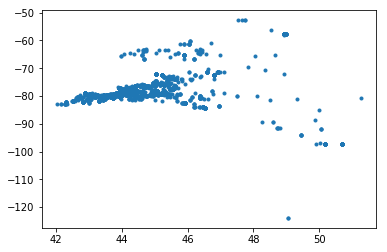

In [340]:
import mplleaflet
plt.scatter(base["lat"], base["lng"], marker=".")

## Convertendo Objects a Int

In [341]:
objects = []
for c in base.columns:
    if (base[c].dtype == 'object'):
        objects.append(c)
objects

['meanwdire', 'precipi', 'precipsource', 'precipm']

### precipi

In [344]:
set(base['precipi'])

{nan,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.23',
 '0.24',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.37',
 '0.39',
 '0.42',
 '0.43',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.50',
 '0.51',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.67',
 '0.71',
 '0.75',
 '0.79',
 '0.83',
 '0.87',
 '0.91',
 '0.96',
 '0.97',
 '0.98',
 '1.00',
 '1.10',
 '1.12',
 '1.14',
 '1.18',
 '1.26',
 '1.38',
 '1.46',
 '1.54',
 '1.57',
 '1.81',
 '1.85',
 '2.01',
 '2.60',
 '5.59',
 'T'}

In [345]:
base['precipi'].replace({'T':6},inplace=True)

In [346]:
set(base['precipi'])

{nan,
 6,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.23',
 '0.24',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.37',
 '0.39',
 '0.42',
 '0.43',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.50',
 '0.51',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.67',
 '0.71',
 '0.75',
 '0.79',
 '0.83',
 '0.87',
 '0.91',
 '0.96',
 '0.97',
 '0.98',
 '1.00',
 '1.10',
 '1.12',
 '1.14',
 '1.18',
 '1.26',
 '1.38',
 '1.46',
 '1.54',
 '1.57',
 '1.81',
 '1.85',
 '2.01',
 '2.60',
 '5.59'}

In [347]:
base['precipi'] = base['precipi'].astype('float')

In [348]:
set(base['precipi'])

{0.0,
 nan,
 nan,
 0.03,
 0.2,
 0.24,
 0.28,
 0.98,
 1.0,
 nan,
 0.12,
 0.39,
 0.51,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.26,
 0.45,
 0.46,
 0.55,
 0.67,
 0.71,
 6.0,
 nan,
 nan,
 2.01,
 nan,
 nan,
 nan,
 0.22,
 nan,
 nan,
 nan,
 nan,
 0.59,
 nan,
 nan,
 nan,
 1.18,
 nan,
 nan,
 nan,
 0.96,
 nan,
 nan,
 nan,
 nan,
 0.19,
 nan,
 nan,
 nan,
 nan,
 0.01,
 0.07,
 0.1,
 0.13,
 0.17,
 0.21,
 0.29,
 1.85,
 nan,
 0.09,
 0.18,
 0.3,
 0.31,
 0.43,
 0.5,
 0.56,
 0.6,
 0.61,
 1.14,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.42,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.12,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.11,
 1.46,
 nan,
 nan,
 0.36,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.64,
 1.38,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.54,
 2.6,
 nan,
 nan,
 nan,
 nan,
 0.33,
 nan,
 nan,
 1.57,
 nan,
 nan,
 nan,
 nan,
 0.23,
 nan,
 nan,
 0.08,
 nan,
 nan,
 0.02,
 nan,
 nan,
 0.34,
 0.53,
 0.63,
 0.75,
 0.87,
 nan,
 nan,
 nan,
 1.54,
 nan,
 nan,
 nan,
 0.04,
 0.47,
 nan,
 1.26,
 nan,
 nan,
 na

### precipm 

In [352]:
set(base['precipm'])

{nan,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.27',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.67',
 '10.7',
 '11.0',
 '11.4',
 '11.7',
 '12.0',
 '12.19',
 '12.70',
 '13.0',
 '13.46',
 '13.72',
 '14.0',
 '14.22',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.3',
 '17.0',
 '18.0',
 '19.0',
 '2.0',
 '2.03',
 '2.29',
 '2.3',
 '2.5',
 '2.8',
 '20.0',
 '20.1',
 '21.0',
 '22.0',
 '23.0',
 '24.38',
 '24.6',
 '25.0',
 '25.40',
 '28.0',
 '28.4',
 '29.0',
 '29.97',
 '3.0',
 '3.3',
 '3.30',
 '3.56',
 '3.6',
 '32.0',
 '35.0',
 '37.0',
 '37.1',
 '39.0',
 '39.88',
 '4.0',
 '4.06',
 '4.1',
 '4.57',
 '4.83',
 '45.97',
 '47.0',
 '5.0',
 '5.1',
 '5.33',
 '5.8',
 '51.0',
 '6.0',
 '6.1',
 '6.6',
 '6.60',
 '66.1',
 '7.0',
 '7.1',
 '7.4',
 '7.62',
 '8.0',
 '8.13',
 '8.4',
 '8.6',
 '8.64',
 '9.0',
 '9.2',
 '9.4',
 'T'}

In [353]:
base['precipm'].replace({'T': 10},inplace=True)

In [354]:
set(base['precipm'])

{nan,
 10,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.27',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.67',
 '10.7',
 '11.0',
 '11.4',
 '11.7',
 '12.0',
 '12.19',
 '12.70',
 '13.0',
 '13.46',
 '13.72',
 '14.0',
 '14.22',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.3',
 '17.0',
 '18.0',
 '19.0',
 '2.0',
 '2.03',
 '2.29',
 '2.3',
 '2.5',
 '2.8',
 '20.0',
 '20.1',
 '21.0',
 '22.0',
 '23.0',
 '24.38',
 '24.6',
 '25.0',
 '25.40',
 '28.0',
 '28.4',
 '29.0',
 '29.97',
 '3.0',
 '3.3',
 '3.30',
 '3.56',
 '3.6',
 '32.0',
 '35.0',
 '37.0',
 '37.1',
 '39.0',
 '39.88',
 '4.0',
 '4.06',
 '4.1',
 '4.57',
 '4.83',
 '45.97',
 '47.0',
 '5.0',
 '5.1',
 '5.33',
 '5.8',
 '51.0',
 '6.0',
 '6.1',
 '6.6',
 '6.60',
 '66.1',
 '7.0',
 '7.1',
 '7.4',
 '7.62',
 '8.0',
 '8.13',
 '8.4',
 '8.6',
 '8.64',
 '9.0',
 '9.2',
 '9.4'}

In [355]:
base['precipm'] = base['precipm'].astype("float")

### meanwdire

In [342]:
set(base['meanwdire'])

{nan,
 'ENE',
 'ESE',
 'East',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'North',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'South',
 'Variable',
 'WNW',
 'WSW',
 'West'}

In [343]:
#Considerada pouco importante
base.drop('meanwdire',axis=1,inplace=True)

### precipsource

In [359]:
set(base['precipsource']) #eli

{nan, '3Or6HourObs', 'HourlyObs', 'Precip24Synop', 'Precip6GroupSynop'}

In [360]:
#Considerada pouco importante
base.drop('precipsource', axis=1,inplace=True)

## Convertendo Lontitude e Latitude para Rad

In [361]:
base['lat'] = base['lat']*np.pi/180
base['lng'] = base['lng']*np.pi/180

In [362]:
base.head(10)

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,0.855986,-2.162174,0.0,62.0,0.0,50.0,0.0,10.0,0.00,...,16.0,30.04,30.01,-1.0,48.0,75.0,12.0,69.0,50.0,46.0
1,20150603,0.855986,-2.162174,0.0,52.0,0.0,46.0,0.0,12.0,0.00,...,12.0,30.26,30.03,38.0,50.0,98.0,6.0,62.0,54.0,40.0
2,20080504,0.810612,-1.106800,0.0,44.0,0.0,36.0,0.0,6.0,0.01,...,7.0,30.22,30.07,59.0,36.0,100.0,-2.0,61.0,43.0,28.0
3,20111026,0.807068,-1.109066,0.0,46.0,0.0,51.0,0.0,7.0,0.08,...,7.0,29.61,29.49,320.0,38.0,95.0,5.0,49.0,45.0,32.0
4,20170501,0.809122,-1.102953,0.0,40.0,0.0,32.0,0.0,4.0,0.16,...,4.0,30.27,30.12,191.0,30.0,83.0,0.0,49.0,39.0,21.0
5,20100709,0.810502,-1.119235,0.0,73.0,0.0,52.0,8.0,21.0,0.00,...,22.0,30.01,29.89,218.0,66.0,92.0,19.0,80.0,69.0,62.0
6,20110512,0.808688,-1.111839,0.0,42.0,0.0,77.0,0.0,4.0,0.00,...,5.0,30.17,30.04,39.0,38.0,95.0,4.0,44.0,39.0,37.0
7,20020830,0.884983,-1.694755,0.0,72.0,0.0,79.0,6.0,22.0,0.00,...,22.0,NaN,NaN,162.0,69.0,100.0,20.0,75.0,71.0,66.0
8,20020914,0.884983,-1.694755,0.0,54.0,0.0,38.0,0.0,8.0,0.00,...,12.0,NaN,NaN,297.0,43.0,96.0,7.0,64.0,46.0,38.0
9,20020917,0.884983,-1.694755,0.0,72.0,0.0,41.0,7.0,17.0,0.00,...,22.0,NaN,NaN,174.0,59.0,88.0,17.0,81.0,63.0,55.0


## Limpando features pouco relevantes

In [363]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 41 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
meantempi            3502 non-null float64
snow                 3561 non-null float64
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
precipi              3675 non-null float64
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
rain                 3561 non-null float64
minwspdm             3397 non-null float64
meanwindspdi         3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
minwspdi             3397 non-null float64
meanpressurei        3327 non-null float64
gdegreedays          3502 non-null float64
mindewptm            3484 non-null 

In [364]:
# Serão eliminadas as features de temperatura em ºF das bases
base.drop('meantempi',axis=1,inplace=True)
base.drop('mintempi',axis=1,inplace=True)
base.drop('meandewpti',axis=1,inplace=True)
base.drop('maxtempi',axis=1,inplace=True)
base.drop('maxdewpti',axis=1,inplace=True)
base.drop('mindewpti',axis=1,inplace=True)

In [365]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 35 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
snow                 3561 non-null float64
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
precipi              3675 non-null float64
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
rain                 3561 non-null float64
minwspdm             3397 non-null float64
meanwindspdi         3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
minwspdi             3397 non-null float64
meanpressurei        3327 non-null float64
gdegreedays          3502 non-null float64
mindewptm            3484 non-null float64
maxwspdi             3397 non-null 

## Preenchimento de NaN

In [366]:
# Instancia o modelo e diz o número de vizinhos
# OBS.: evite número par para evitar empates e também números grandes para usar uma vizinhança mais próximas
kviz = KNeighborsRegressor(n_neighbors=5)

In [367]:
co = base.columns
co = co.delete(0)
co = co.delete(0)
co = co.delete(0)
co

Index([u'thunder', u'snow', u'minhumidity', u'coolingdegreedays', u'maxdewptm',
       u'precipi', u'heatingdegreedays', u'meanpressurem', u'rain',
       u'minwspdm', u'meanwindspdi', u'fog', u'humidity', u'minwspdi',
       u'meanpressurei', u'gdegreedays', u'mindewptm', u'maxwspdi',
       u'minpressurem', u'maxtempm', u'meanwindspdm', u'maxpressurem', u'hail',
       u'meandewptm', u'maxwspdm', u'precipm', u'meantempm', u'maxpressurei',
       u'minpressurei', u'meanwdird', u'maxhumidity', u'mintempm'],
      dtype='object')

In [271]:
size = len(base)
size

3675

In [368]:
t = base.copy()

In [395]:
base = t.copy()
mse = {}
for c in co:
    if (base[c].count() < size):
        x = base.dropna(subset=[c])
        x_train, x_test = train_test_split(x, test_size=0.20, random_state=42)
        kviz = KNeighborsRegressor(n_neighbors=11)
        kviz.fit(x_train.loc[:,['date','lat','lng']],x_train[c])
        teste = base.loc[base[c].isnull()]
        y_pre = kviz.predict(x_test.loc[:,['date','lat','lng']])
        mse[c] = r2_score(x_test[c],y_pre)
        teste[c] = kviz.predict(teste.loc[:,['date','lat','lng']])
        base = pd.concat([x,teste])
mse

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


{'coolingdegreedays': 0.280583090342289,
 'fog': 0.029197172334958443,
 'gdegreedays': 0.547094691038035,
 'hail': 0.10618441823753377,
 'heatingdegreedays': 0.46707683985365966,
 'humidity': 0.3120700188931208,
 'maxdewptm': 0.5085420204665652,
 'maxhumidity': 0.21639979203814264,
 'maxpressurei': 0.296390075682735,
 'maxpressurem': 0.3006181566859033,
 'maxtempm': 0.4330395504083753,
 'maxwspdi': 0.13332110293154464,
 'maxwspdm': 0.1304317609623865,
 'meandewptm': 0.5817780699913406,
 'meanpressurei': 0.2785735256922901,
 'meanpressurem': 0.3093069189476123,
 'meantempm': 0.5089944986687273,
 'meanwdird': 0.21197191396187742,
 'meanwindspdi': 0.06508273107563001,
 'meanwindspdm': 0.17034966925241168,
 'mindewptm': 0.5744630404479057,
 'minhumidity': 0.22604727631652977,
 'minpressurei': 0.24812217173080198,
 'minpressurem': 0.25550138515468435,
 'mintempm': 0.45382484164109227,
 'minwspdi': 0.11098387155534206,
 'minwspdm': 0.15404676835218123,
 'rain': 0.0173836280857681,
 'snow': -

In [397]:
base.describe()

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
count,3.675000e+03,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,...,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,2.008286e+07,0.784041,-1.367816,0.046481,0.005220,44.065158,1.349437,11.914756,0.053027,7.722226,...,0.001187,8.939790,20.585529,1.054221,14.750526,30.070338,29.913189,137.854818,89.272158,8.820507
std,5.152130e+04,0.027802,0.105574,0.208038,0.071755,18.152137,2.970866,5.934062,0.312481,7.963937,...,0.033111,6.154926,9.896839,4.422119,5.322948,0.171560,0.185812,114.999454,11.215320,5.640591
min,1.997050e+07,0.733476,-2.162174,0.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,0.000000,...,0.000000,-27.000000,0.000000,0.000000,-24.000000,29.370000,29.050000,-1.000000,24.000000,-33.000000
25%,2.004042e+07,0.766937,-1.391900,0.000000,0.000000,30.000000,0.000000,8.000000,0.000000,0.000000,...,0.000000,5.000000,15.000000,0.000000,12.000000,29.960000,29.800000,-1.000000,84.000000,5.000000
50%,2.008070e+07,0.782140,-1.382430,0.000000,0.000000,43.000000,0.000000,13.000000,0.000000,6.000000,...,0.000000,10.000000,19.727273,0.000000,15.000000,30.080000,29.926364,144.000000,93.000000,9.000000
75%,2.012080e+07,0.791357,-1.352664,0.000000,0.000000,56.000000,1.000000,16.000000,0.000000,12.000000,...,0.000000,14.000000,26.000000,0.000000,18.000000,30.185455,30.040000,232.000000,98.000000,13.000000
max,2.018100e+07,0.894822,-0.920427,1.000000,1.000000,100.000000,20.000000,31.000000,6.000000,76.000000,...,1.000000,25.000000,200.000000,141.990000,30.000000,30.810000,30.460000,360.000000,100.000000,25.000000


## Criando base usando as estações do ano 

In [398]:
primavera = base.loc[(base['date']%1000<=620) & (base['date']%1000>=320)]
primavera['date'] = "0" #Primavera
verao = base.loc[(base['date']%1000<=921) & (base['date']%1000>=621)]
verao['date'] = "1" #Verão
outono = base.loc[(base['date']%1000<=1220) & (base['date']%1000>=922)]
outono['date'] = "2" #Outono
inverno = base.loc[(base['date']%1000<=1221) & (base['date']%1000>=319)]
inverno['date'] = "3" #Inverno
frames = [primavera,verao,outono,inverno]
dadosEstacao = pd.concat(frames)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [399]:
dadosEstacao

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
0,0,0.855986,-2.162174,0.000000,0.000000,50.000000,0.000000,10.000000,0.000000,4.000000,...,0.0,9.000000,2.000000,0.000000,16.000000,30.040000,30.010000,-1.000000,75.000000,12.000000
1,0,0.855986,-2.162174,0.000000,0.000000,46.000000,0.000000,12.000000,0.000000,12.000000,...,0.0,10.000000,15.000000,0.000000,12.000000,30.260000,30.030000,38.000000,98.000000,6.000000
2,0,0.810612,-1.106800,0.000000,0.000000,36.000000,0.000000,6.000000,0.010000,21.000000,...,0.0,2.000000,15.000000,0.200000,7.000000,30.220000,30.070000,59.000000,100.000000,-2.000000
4,0,0.809122,-1.102953,0.000000,0.000000,32.000000,0.000000,4.000000,0.160000,24.000000,...,0.0,-1.000000,17.000000,4.000000,4.000000,30.270000,30.120000,191.000000,83.000000,0.000000
6,0,0.808688,-1.111839,0.000000,0.000000,77.000000,0.000000,4.000000,0.000000,23.000000,...,0.0,3.000000,43.000000,0.000000,5.000000,30.170000,30.040000,39.000000,95.000000,4.000000
35,0,0.875937,-1.695151,0.000000,0.000000,9.000000,0.000000,-4.000000,0.000000,22.000000,...,0.0,-7.000000,48.000000,0.000000,6.000000,29.920000,29.720000,-1.000000,67.000000,0.000000
36,0,0.875937,-1.695151,0.000000,0.000000,7.000000,0.000000,-7.000000,0.000000,18.000000,...,0.0,-9.000000,28.000000,0.000000,8.000000,30.110000,29.990000,-1.000000,39.000000,0.000000
37,0,0.875937,-1.695151,0.000000,0.000000,9.000000,0.000000,-1.000000,0.000000,3.000000,...,0.0,-3.000000,56.000000,0.000000,16.000000,29.890000,29.790000,-1.000000,29.000000,11.000000
38,0,0.875937,-1.695151,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,18.000000,...,0.0,-2.000000,18.000000,0.000000,8.000000,30.100000,29.910000,-1.000000,53.000000,4.000000
39,0,0.875937,-1.695151,0.000000,0.000000,16.000000,0.000000,1.000000,0.000000,13.000000,...,0.0,-2.000000,43.000000,0.000000,11.000000,30.150000,30.030000,-1.000000,38.000000,4.000000


## Atualizando a Data para somente o mês

In [400]:
base

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
0,20150603,0.855986,-2.162174,0.000000,0.000000,50.000000,0.000000,10.000000,0.000000,4.000000,...,0.0,9.000000,2.000000,0.000000,16.000000,30.040000,30.010000,-1.000000,75.000000,12.000000
1,20150603,0.855986,-2.162174,0.000000,0.000000,46.000000,0.000000,12.000000,0.000000,12.000000,...,0.0,10.000000,15.000000,0.000000,12.000000,30.260000,30.030000,38.000000,98.000000,6.000000
2,20080504,0.810612,-1.106800,0.000000,0.000000,36.000000,0.000000,6.000000,0.010000,21.000000,...,0.0,2.000000,15.000000,0.200000,7.000000,30.220000,30.070000,59.000000,100.000000,-2.000000
3,20111026,0.807068,-1.109066,0.000000,0.000000,51.000000,0.000000,7.000000,0.080000,20.000000,...,0.0,3.000000,37.000000,2.000000,7.000000,29.610000,29.490000,320.000000,95.000000,5.000000
4,20170501,0.809122,-1.102953,0.000000,0.000000,32.000000,0.000000,4.000000,0.160000,24.000000,...,0.0,-1.000000,17.000000,4.000000,4.000000,30.270000,30.120000,191.000000,83.000000,0.000000
5,20100709,0.810502,-1.119235,0.000000,0.000000,52.000000,8.000000,21.000000,0.000000,0.000000,...,0.0,19.000000,37.000000,0.000000,22.000000,30.010000,29.890000,218.000000,92.000000,19.000000
6,20110512,0.808688,-1.111839,0.000000,0.000000,77.000000,0.000000,4.000000,0.000000,23.000000,...,0.0,3.000000,43.000000,0.000000,5.000000,30.170000,30.040000,39.000000,95.000000,4.000000
35,20150413,0.875937,-1.695151,0.000000,0.000000,9.000000,0.000000,-4.000000,0.000000,22.000000,...,0.0,-7.000000,48.000000,0.000000,6.000000,29.920000,29.720000,-1.000000,67.000000,0.000000
36,20150414,0.875937,-1.695151,0.000000,0.000000,7.000000,0.000000,-7.000000,0.000000,18.000000,...,0.0,-9.000000,28.000000,0.000000,8.000000,30.110000,29.990000,-1.000000,39.000000,0.000000
37,20150415,0.875937,-1.695151,0.000000,0.000000,9.000000,0.000000,-1.000000,0.000000,3.000000,...,0.0,-3.000000,56.000000,0.000000,16.000000,29.890000,29.790000,-1.000000,29.000000,11.000000


In [401]:
base['date'] = (base['date']//100)%100

In [402]:
base

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
0,6,0.855986,-2.162174,0.000000,0.000000,50.000000,0.000000,10.000000,0.000000,4.000000,...,0.0,9.000000,2.000000,0.000000,16.000000,30.040000,30.010000,-1.000000,75.000000,12.000000
1,6,0.855986,-2.162174,0.000000,0.000000,46.000000,0.000000,12.000000,0.000000,12.000000,...,0.0,10.000000,15.000000,0.000000,12.000000,30.260000,30.030000,38.000000,98.000000,6.000000
2,5,0.810612,-1.106800,0.000000,0.000000,36.000000,0.000000,6.000000,0.010000,21.000000,...,0.0,2.000000,15.000000,0.200000,7.000000,30.220000,30.070000,59.000000,100.000000,-2.000000
3,10,0.807068,-1.109066,0.000000,0.000000,51.000000,0.000000,7.000000,0.080000,20.000000,...,0.0,3.000000,37.000000,2.000000,7.000000,29.610000,29.490000,320.000000,95.000000,5.000000
4,5,0.809122,-1.102953,0.000000,0.000000,32.000000,0.000000,4.000000,0.160000,24.000000,...,0.0,-1.000000,17.000000,4.000000,4.000000,30.270000,30.120000,191.000000,83.000000,0.000000
5,7,0.810502,-1.119235,0.000000,0.000000,52.000000,8.000000,21.000000,0.000000,0.000000,...,0.0,19.000000,37.000000,0.000000,22.000000,30.010000,29.890000,218.000000,92.000000,19.000000
6,5,0.808688,-1.111839,0.000000,0.000000,77.000000,0.000000,4.000000,0.000000,23.000000,...,0.0,3.000000,43.000000,0.000000,5.000000,30.170000,30.040000,39.000000,95.000000,4.000000
35,4,0.875937,-1.695151,0.000000,0.000000,9.000000,0.000000,-4.000000,0.000000,22.000000,...,0.0,-7.000000,48.000000,0.000000,6.000000,29.920000,29.720000,-1.000000,67.000000,0.000000
36,4,0.875937,-1.695151,0.000000,0.000000,7.000000,0.000000,-7.000000,0.000000,18.000000,...,0.0,-9.000000,28.000000,0.000000,8.000000,30.110000,29.990000,-1.000000,39.000000,0.000000
37,4,0.875937,-1.695151,0.000000,0.000000,9.000000,0.000000,-1.000000,0.000000,3.000000,...,0.0,-3.000000,56.000000,0.000000,16.000000,29.890000,29.790000,-1.000000,29.000000,11.000000


In [403]:
base.shape

(3675, 35)

## Padronizando com o RobustScaler

In [404]:
# O robust previne melhor contra outliers para que não interfiram negativamente na média e desvio padrão
padraoLimpa = RobustScaler().fit_transform(limpa)

In [405]:
padraoMes = RobustScaler().fit_transform(base)
padraoEstacao = RobustScaler().fit_transform(dadosEstacao)

In [406]:
padraoMes

array([[  1.        ,   3.02396638, -19.87327047, ...,  -0.6223176 ,
         -1.28571429,   0.375     ],
       [  1.        ,   3.02396638, -19.87327047, ...,  -0.45493562,
          0.35714286,  -0.375     ],
       [  0.        ,   1.16592863,   7.02495795, ...,  -0.36480687,
          0.5       ,  -1.375     ],
       ...,
       [ -1.        ,   2.94479887,   9.53934869, ...,  -0.09949278,
         -0.38961039,  -0.72727273],
       [  1.        ,   2.94479887,   9.53934869, ...,  -0.17986734,
         -0.33766234,   0.02272727],
       [  1.        ,   2.94479887,   9.53934869, ...,  -0.31213422,
         -0.33766234,   0.02272727]])

In [407]:
df_padraoLimpa = pd.DataFrame(padraoLimpa, columns=limpa.columns)

In [408]:
df_padraoMes = pd.DataFrame(padraoMes, columns=base.columns)
df_padraoEstacao = pd.DataFrame(padraoEstacao, columns=dadosEstacao.columns)

In [409]:
df_padraoMes

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
0,1.0,3.023966,-19.873270,0.000000,0.000000,0.269231,0.000000,-0.375000,0.000000,-0.166667,...,0.0,-0.111111,-1.611570,0.000000,0.166667,-1.774194e-01,0.348485,-0.622318,-1.285714,0.375000
1,1.0,3.023966,-19.873270,0.000000,0.000000,0.115385,0.000000,-0.125000,0.000000,0.500000,...,0.0,0.000000,-0.429752,0.000000,-0.500000,7.983871e-01,0.431818,-0.454936,0.357143,-0.375000
2,0.0,1.165929,7.024958,0.000000,0.000000,-0.269231,0.000000,-0.875000,0.010000,1.250000,...,0.0,-0.888889,-0.429752,0.200000,-1.333333,6.209677e-01,0.598485,-0.364807,0.500000,-1.375000
3,5.0,1.020789,6.967195,0.000000,0.000000,0.307692,0.000000,-0.750000,0.080000,1.166667,...,0.0,-0.777778,1.570248,2.000000,-1.333333,-2.084677e+00,-1.818182,0.755365,0.142857,-0.500000
4,0.0,1.104887,7.123006,0.000000,0.000000,-0.423077,0.000000,-1.125000,0.160000,1.500000,...,0.0,-1.222222,-0.247934,4.000000,-1.833333,8.427419e-01,0.806818,0.201717,-0.714286,-1.125000
5,2.0,1.161400,6.708035,0.000000,0.000000,0.346154,8.000000,1.000000,0.000000,-0.500000,...,0.0,1.000000,1.570248,0.000000,1.166667,-3.104839e-01,-0.151515,0.317597,-0.071429,1.250000
6,0.0,1.087138,6.896516,0.000000,0.000000,1.307692,0.000000,-1.125000,0.000000,1.416667,...,0.0,-0.777778,2.115702,0.000000,-1.666667,3.991935e-01,0.473485,-0.450644,0.142857,-0.625000
7,-1.0,3.840964,-7.970302,0.000000,0.000000,-1.307692,0.000000,-2.125000,0.000000,1.333333,...,0.0,-1.888889,2.570248,0.000000,-1.500000,-7.096774e-01,-0.859848,-0.622318,-1.857143,-1.125000
8,-1.0,3.840964,-7.970302,0.000000,0.000000,-1.384615,0.000000,-2.500000,0.000000,1.000000,...,0.0,-2.111111,0.752066,0.000000,-1.166667,1.330645e-01,0.265152,-0.622318,-3.857143,-1.125000
9,-1.0,3.840964,-7.970302,0.000000,0.000000,-1.307692,0.000000,-1.750000,0.000000,-0.250000,...,0.0,-1.444444,3.297521,0.000000,0.166667,-8.427419e-01,-0.568182,-0.622318,-4.571429,0.250000


In [410]:
df_padraoLimpa.to_csv("americanToadPadraoLimpa.csv")

In [411]:
df_padraoMes.to_csv("americanToadPadraoMes.csv")

In [412]:
df_padraoEstacao.to_csv("americanToadPadraoEstacao.csv")